In [1]:
# Machine Learning Code

In [2]:
# In order to start we need to Load in some 

In [2]:
# Intro ML Group Project
from packaging import version
import sklearn
import matplotlib.pyplot as plt

from pathlib import Path
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer  # Import the imputer

In [4]:
# Now, we can load the data set so that we can explore all the features.

In [3]:
# Loading in the training data set

taxi_train = pd.read_csv("train.csv", nrows=30000)

In [5]:
# Now for the test data set that we will not be touching

taxi_test  = pd.read_csv("test.csv")

In [ ]:
# Now we have to explore the data set

In [ ]:
taxi_train.head()

In [ ]:
# A better way to get an idea of what is happening in the data set

taxi_train.info()

Text(0.5, 1.0, 'Instances per Fare Amount')

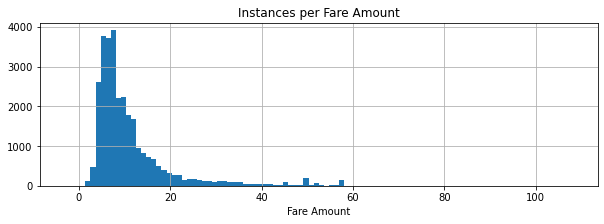

In [6]:
# From the above command we see that we have two object type attributes,
# one integer attribute, and five float type attributes.

# We can have a better understanding of the scales of the different attributes
# By visualizing them

taxi_train[taxi_train.fare_amount <110].fare_amount.hist(bins = 100,
                                                         figsize = (10,3))

plt.xlabel("Fare Amount")
plt.title("Instances per Fare Amount")

In [ ]:
# 

In [ ]:
# Based on the look of the scatter matrix it seems like there is some scaling that needs to be done

In [7]:
# Impute missing values with the mean
imputer = SimpleImputer(strategy="mean")
taxi_train_imputed = pd.DataFrame(imputer.fit_transform(taxi_train), columns=taxi_train.columns)
taxi_test_imputed = pd.DataFrame(imputer.transform(taxi_test), columns=taxi_test.columns)

ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: '2009-06-15 17:26:21.0000001'

In [ ]:
# Display the first few rows of the DataFrame after imputation
print("Imputed Taxi Train Data:")
print(taxi_train_imputed.head())

In [ ]:
# Display the info of the imputed DataFrame
print("Imputed Taxi Train Info:")
print(taxi_train_imputed.info())

In [ ]:
# We do not want to have any missing values/negative values in the fare amount
taxi_train['fare_amount'][taxi_train['fare_amount']<0] = 0.1
taxi_train[taxi_train['fare_amount']<0]

In [ ]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

attributes = ["trip_duration", "distance_traveled", "num_of_passengers",
              "fare"]
scatter_matrix(taxi_train[attributes], figsize=(12, 8))
plt.show()

In [ ]:
# Linear Regressor

lr = LinearRegression()

X_train= taxi_train[["trip_duration"]].values
y_train= taxi_train[["fare"]].values
X_test= taxi_test[["trip_duration"]].values
y_test= taxi_test[["fare"]].values

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

from sklearn.metrics import mean_squared_error

print("Test RMSE: %.3f" % mean_squared_error( y_test, y_pred) ** 0.5)

In [ ]:
# RandomForest Regression

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=200)
rf.fit(X_train, y_train.ravel())
y_pred = rf.predict(X_test)

print("Test RMSE: %.3f" % mean_squared_error( y_test, y_pred) ** 0.5)

In [9]:
# Results appear to be skewed due to the differences in scaling between features

# Dealing with Datetime

taxi_train['pickup_datetime'] = pd.to_datetime(taxi_train.pickup_datetime)
taxi_test['pickup_datetime'] = pd.to_datetime(taxi_test.pickup_datetime)


## We want to be able to work with daytime feature in a way that is useful

In [10]:
# Since there is a lot to be known from the time of pickup we need to separate information

# Incomplete

taxi_train.loc[:, 'pickup_hour'] = taxi_train['pickup_datetime'].taxi_train.hour
taxi_train.loc[:, 'pickup_weekday'] = taxi_train['pickup_datetime'].taxi_train.day_name()
taxi_train.loc[:, 'pickup_date'] = taxi_train['pickup_datetime'].dtaxi_train.day
taxi_train.loc[:, 'pickup_month'] = taxi_train['pickup_datetime'].taxi_train.month
taxi_train.loc[:, 'pickup_day'] = taxi_train['pickup_datetime'].taxi_train.dayofweek
taxi_test.loc[:, 'pickup_hour'] = taxi_test['pickup_datetime'].taxi_train.hour
taxi_test.loc[:, 'pickup_weekday'] = taxi_test['pickup_datetime'].taxi_train.day_name()
taxi_test.loc[:, 'pickup_date'] = taxi_test['pickup_datetime'].taxi_train.day
taxi_test.loc[:, 'pickup_month'] = taxi_test['pickup_datetime'].taxi_train.month
taxi_test.loc[:, 'pickup_day'] = taxi_test['pickup_datetime'].taxi_train.dayofweek

AttributeError: 'Series' object has no attribute 'taxi_train'